In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dropout, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

import os

first i did data augmentation separetely you'll fin the the code of data augmetation in (augmentednotebook).

then i divide my data into train validation and test you'll find the code of spliting data in (split_datanotebook)

data path in kaggle

In [2]:
train_dir=('../input/spilited/data2/train')
val_dir=('../input/spilited/data2/val')

now we'll start our classification 
i did use ImageDataGenerator with only rescale in order to avoid data augmentation since it was done before and also to use flow from directory to avoid problem of allocation memory

In [3]:
train_gen = ImageDataGenerator(
    rescale=1./255
)

validation_gen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_gen.flow_from_directory(
        train_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_gen.flow_from_directory(
        val_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 5600 images belonging to 4 classes.
Found 1600 images belonging to 4 classes.


importing VGG16 model

In [4]:
image_input = Input(shape=(224, 224, 3))
model = VGG16(weights='imagenet',include_top=False,input_tensor=image_input)

2022-11-21 22:54:29.725688: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 22:54:29.735642: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 22:54:29.736528: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-21 22:54:29.738364: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

add some layers to our pretrained model

In [6]:
x = model.output
x = Flatten()(x)
x = Dense(512)(x)
x = Dense(512)(x)

predictions = Dense(4, activation='softmax')(x) 
model = Model(inputs=model.input, outputs=predictions)

In [7]:
opt = Adam(learning_rate=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=["accuracy"])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [8]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator)

Epoch 1/15


2022-11-21 22:54:31.784187: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-21 22:54:33.000274: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


175/175 [==============================] - 46s 230ms/step - loss: 1.4201 - accuracy: 0.2707 - val_loss: 1.3750 - val_accuracy: 0.3381
Epoch 2/15
175/175 [==============================] - 40s 229ms/step - loss: 1.1803 - accuracy: 0.4338 - val_loss: 1.0069 - val_accuracy: 0.5125
Epoch 3/15
175/175 [==============================] - 40s 228ms/step - loss: 0.8535 - accuracy: 0.5825 - val_loss: 0.6452 - val_accuracy: 0.6750
Epoch 4/15
175/175 [==============================] - 40s 228ms/step - loss: 0.6127 - accuracy: 0.6907 - val_loss: 0.5373 - val_accuracy: 0.7000
Epoch 5/15
175/175 [==============================] - 40s 229ms/step - loss: 0.4856 - accuracy: 0.7482 - val_loss: 0.4755 - val_accuracy: 0.7350
Epoch 6/15
175/175 [==============================] - 40s 228ms/step - loss: 0.3821 - accuracy: 0.8068 - val_loss: 0.4549 - val_accuracy: 0.7869
Epoch 7/15
175/175 [==============================] - 40s 231ms/step - loss: 0.3513 - accuracy: 0.8350 - val_loss: 0.3816 - val_accuracy: 0.8

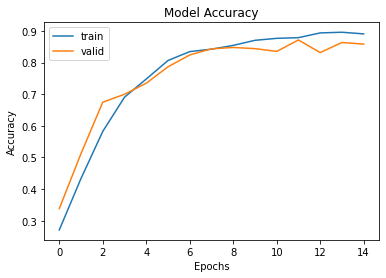

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'valid'])
plt.show()


<function matplotlib.pyplot.legend(*args, **kwargs)>

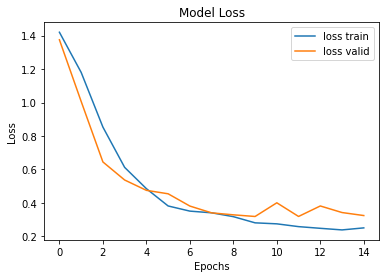

In [10]:

plt.legend(['train', 'valid'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['loss train', 'loss valid'])
plt.legend

In [11]:
model.save('my_model.h5')

In [12]:
from keras.models import load_model
model=load_model('./my_model.h5')

Prediction

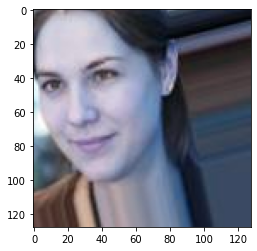

In [13]:
import cv2 as cv
img=cv.imread('../input/spilited/data2/test/augmented_healthy/aug_101_6170.jpg')
plt.imshow(img)

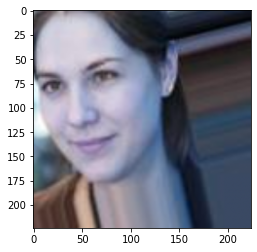

In [14]:
from skimage.transform import resize
resized_image=resize(img,(224,224,3))
plt.imshow(resized_image)

In [15]:
import numpy as np
predictions=model.predict(np.array([resized_image]))
predictions

array([[9.9795616e-01, 1.9930687e-03, 5.0742074e-05, 2.0609162e-08]],
      dtype=float32)

In [16]:
list_index=[0,1,2,3]
classification=['healthy','mild','moderate','severe']
x=predictions
for i in range(4):
    print(classification[list_index[i]],':', round(predictions[0][list_index[i]]*100,2),'%')
    

healthy : 99.8 %
mild : 0.2 %
moderate : 0.01 %
severe : 0.0 %
